In [22]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, pi,sqrt, log
from scipy import integrate
from random import random

f = lambda x: (x**(-1))/(exp(x)+1)

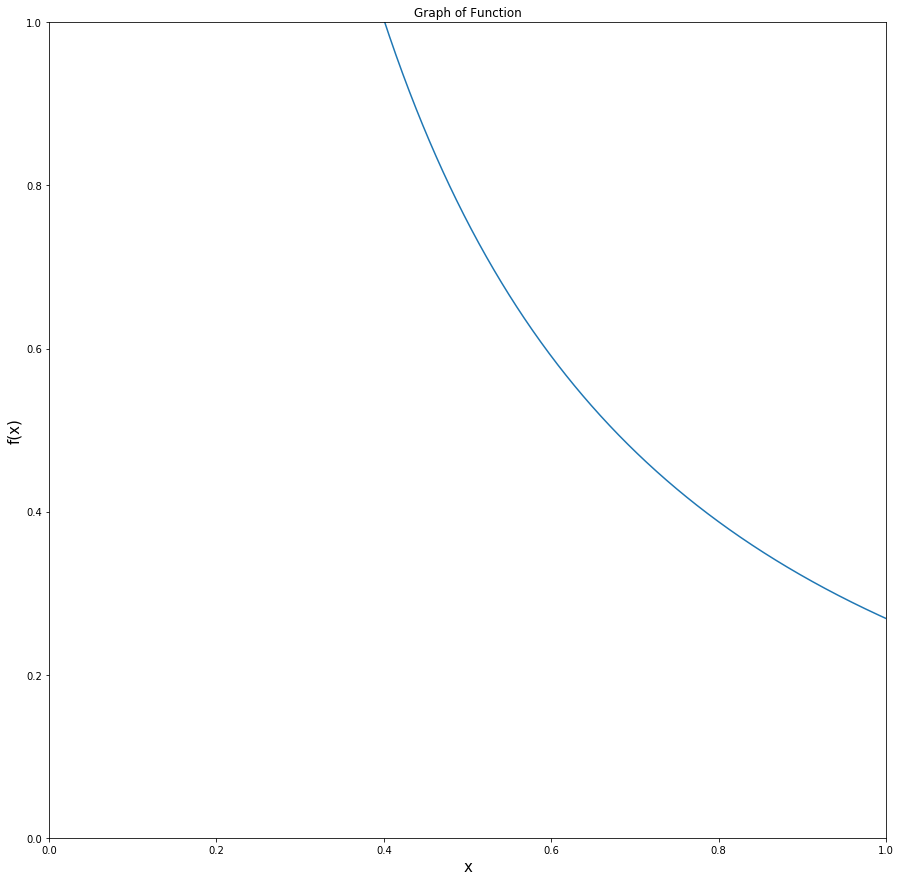

In [23]:
'''
We first graph the function to determine the region that we are looking at.
'''
x = np.linspace(0.0001,1,1000)
y = f(x)

plt.figure(figsize=(15,15))
plt.title('Graph of Function')
plt.axis([0,1,0,1])
plt.xlabel('x', size = 15)
plt.ylabel('f(x)', size = 15)
plt.plot(x,y)
plt.show()

We can form a probability distribution using the weighted function $w(x) = x^{-1}$ by normalizing it on the interval we are looking at.

However, we run into an issue when we integrate $w(x)$ from $0$ to $1$. So let's just integrate from $0.0001$ to $1$.

Then $p(x) = \frac{x^{-1}}{\int_{0.0001}^1{x^{-1}}dx} = \frac{x^{-1}}{\ln{10000}}$. The cumulative distribution function is $F(x)=\int_{0.0001}^x{\frac{y^{-1}}{\ln{10000}}dy} = \frac{\ln{x}}{\ln{10000}}+1.$ Thus, $x$ should be weighted according to $F^{-1}(x) = 10000e^{x-1}.$


In [26]:
'''
This is the algorithm for importance sampling
'''
w = lambda x: x**(-1)
const = integrate.quad(w,0.0001,1)[0]
Finv  = lambda x: exp(const*(x-1))
def IS(N):
    ratio = 0
    for i in range(N):
        s = random()
        ratio += (f(Finv(s))/w(Finv(s)))
    I = ratio*const/N
    return I

In [27]:
print('The value of the integral using importance sampling is %.4f' %IS(1000000))

The value of the integral using importance sampling is 4.3620
